<img src='https://wizardsourcer.com/wp-content/uploads/2019/03/Stackoverflow.png'></img>

<center><h1> A Data Analysis using Stackoverflow’s 2017 and 2018 Annual Developer Survey.</h1></center>

## Each stage of the CRISP-DM process. These stages are:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results


# Business Understanding

In this notebook, I will be exploring the 2017 and 2018 Stack Overflow results in order to glean some information on professional developers and what to focus on to have the best career in India.

There will be three questions I will seek to answer in order to get this information:

1. What Programming Languages are most used to work and Which Programming Languages are most Required in Stackoverflow survey data of 2017 and 2018 ?
2. How does Programming Languages used at work relates with Programming Languages, People Wants to Learn in India According to Stackoverflow survey data of 2017 and 2018?
3. What are the most wanted Programming Languages in India According to Stackoverflow survey data of 2017 and 2018?

# Data Understanding

In order to gain some understanding of the data. I have to do these steps:
* Handle categorical and missing data
* Analyze, Model, and Visualize

In [3]:
# import python libraries to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

#make plots
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# to display graphs in jupyter notebook
%matplotlib inline

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [8]:
# Loading Stackoverflow survey data of 2017 and 2018
# Ref link: https://insights.stackoverflow.com/survey
df_2017 = pd.read_csv('2017/survey_results_public.csv')
df_2018 = pd.read_csv('2018/survey_results_public.csv')

In [22]:
#Little Exploration on Stackoverflow survey data of 2017
df_2017.sample(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
36806,36807,Student,"Yes, both",India,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Strongly agree,Disagree,Somewhat agree,Disagree,Agree,Strongly agree,Disagree,Strongly agree,Agree,Agree,Strongly disagree,Strongly agree,Strongly agree,Agree,Agree,I am actively looking for a job,NaN,Not applicable/ never,Somewhat important,Important,Important,Very important,Not very important,Somewhat important,Important,Important,Important,Somewhat important,Not at all important,Very important,Not very important,Very important,Important,Health benefits; Equipment; Professional devel...,Yes,NaN,NaN,NaN,Very important,Not very important,Important,Somewhat important,Not very important,Somewhat important,Somewhat important,Somewhat important,Not very important,Very important,NaN,NaN,Both,NaN,NaN,NaN,NaN,NaN,9:00 AM,C++; Java; JavaScript; PHP,C++; Java; Python,NaN,NaN,MySQL; Oracle,MySQL,NaN,NaN,Sublime Text; Eclipse,Keep the room absolutely quiet,Agile; Extreme,Git,Multiple times a day,Disagree,Agree,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Hours worked; Customer satisfaction; Benchmark...,Satisfied,Not very satisfied,Satisfied,

In [23]:
df_2017.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [9]:
#Little Exploration on Stackoverflow survey data of 2018
df_2018.sample(5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
98252,90786,Yes,No,Spain,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79662,92625,Yes,Yes,Sri Lanka,"Yes, full-time","Independent contractor, freelancer, or self-em...",Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,"Back-end developer;C-suite executive (CEO, CTO...",6-8 years,6-8 years,Moderately satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,1.0,8.0,7.0,9.0,2.0,5.0,10.0,6.0,3.0,4.0,1.0,11.0,7.0,10.0,6.0,8.0,2.0,4.0,9.0,3.0,5.0,2.0,1.0,4.0,5.0,3.0,1.0,4.0,6.0,2.0,7.0,5.0,3.0,My job status or other personal status changed,U.S. dollars ($),NaN,NaN,NaN,NaN,"Facebook;Jira;Slack;Other chat system (IRC, pr...",NaN,Taken a part-time in-person course in programm...,"A book or e-book from O’Reilly, Apress, or a s...",NaN,To improve my general technical skills or prog...,Strongly agree,Agree,Strongly disagree,C#;Java;PHP;Python;SQL;HTML,C#;Go;Java;Objective-C;SQL;Swift;TypeScript,"MongoDB;MySQL;MariaDB;Microsoft Azure (Tables,...",MongoDB;MariaDB,Azure;iOS;Linux;Mac OS,AWS;iOS;Linux;Mac OS;Firebase,.NET Core,Angular;Hadoop;Node.js;React;TensorFlow,IntelliJ;PHPStorm;Sublime Text;Visual Studio;X...,MacOS,1,Agile;Extreme programming (XP);Kanban;Pair pro...,Git;Mercurial,Once a day,Yes,Yes,The website I was visiting forced me to disabl...,Strongly agree,Somewhat agree,Neither agree nor disagree,Clicked on an online ad

In [10]:
df_2018.head(3)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

## Question 1: What Programming Languages are most used to work and Which Programming Languages are most Required in  Stackoverflow survey data of 2017 and 2018 ?

### Prepare Data

In [70]:
#First make copy of dataframe and then Filter a dataframe by country 
def filter_country(df, column_filter, country, columns):   
    df_copy = df
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filtering the dataframe 
india_2017 = filter_country(df_2017, 'Country', 'India', ['HaveWorkedLanguage', 'WantWorkLanguage'])
india_2018 = filter_country(df_2018, 'Country', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [71]:
#Spliting the columns
def split_column(df, column):
    df_copy = df
    columnSeries = df_copy[column].apply(lambda x: x.split(';'))
    return columnSeries

# Splitting the dataframe by columns.
worked_languages_2017 = split_column(india_2017, 'HaveWorkedLanguage')
wanted_languages_2017 = split_column(india_2017, 'WantWorkLanguage')

worked_languages_2018 = split_column(india_2018, 'LanguageWorkedWith')
wanted_languages_2018 = split_column(india_2018, 'LanguageDesireNextYear')

In [72]:
#Just Flating a nested list
def flat(array_list):
    object_list = []
    for row in array_list:
        for obj in row:
            object_list.append(obj.strip())
            
    return object_list

# Flatting nested list objects.
list_worked_languages_2017 = flat(worked_languages_2017)
list_wanted_languages_2017 = flat(wanted_languages_2017)

list_worked_languages_2018 = flat(worked_languages_2018)
list_wanted_languages_2018 = flat(wanted_languages_2018)

In [73]:
def list_of_group(data_list, year):
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    return grouped_dict

# Grouping the list and creating a dict.
dict_worked_languages_2017 = list_of_group(list_worked_languages_2017, '2017')
dict_wanted_languages_2017 = list_of_group(list_wanted_languages_2017, '2017')

dict_worked_languages_2018 = list_of_group(list_worked_languages_2018, '2018')
dict_wanted_languages_2018 = list_of_group(list_wanted_languages_2018, '2018')

### Data Modelling

In [74]:
#Ref: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
def create_dataframe(data_dicts):    
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    df = df1.append(df2)
    return df

worked_languages = create_dataframe([dict_worked_languages_2017, dict_worked_languages_2018])
wanted_languages = create_dataframe([dict_wanted_languages_2017, dict_wanted_languages_2018])

In [75]:
#Adding Percentage to worked_languages and wanted_languages dataframe
def percentage(df, column):
    df_copy = df
    series = []
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                        df_copy[df_copy[column] == val]['Count'].sum())
    
    joined = pd.Series()
    for i_series in series:
        joined = joined.append(i_series)
        
    return joined

worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

In [76]:
# Get the top 12 languages
top_12_work = worked_languages.sort_values(by=['Percentage'], ascending=False).head(12)['Programming Language'].unique()
top_12_want = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(12)['Programming Language'].unique()

worked_chart = worked_languages[worked_languages['Programming Language'].isin(top_12_work)]
wanted_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_12_want)]

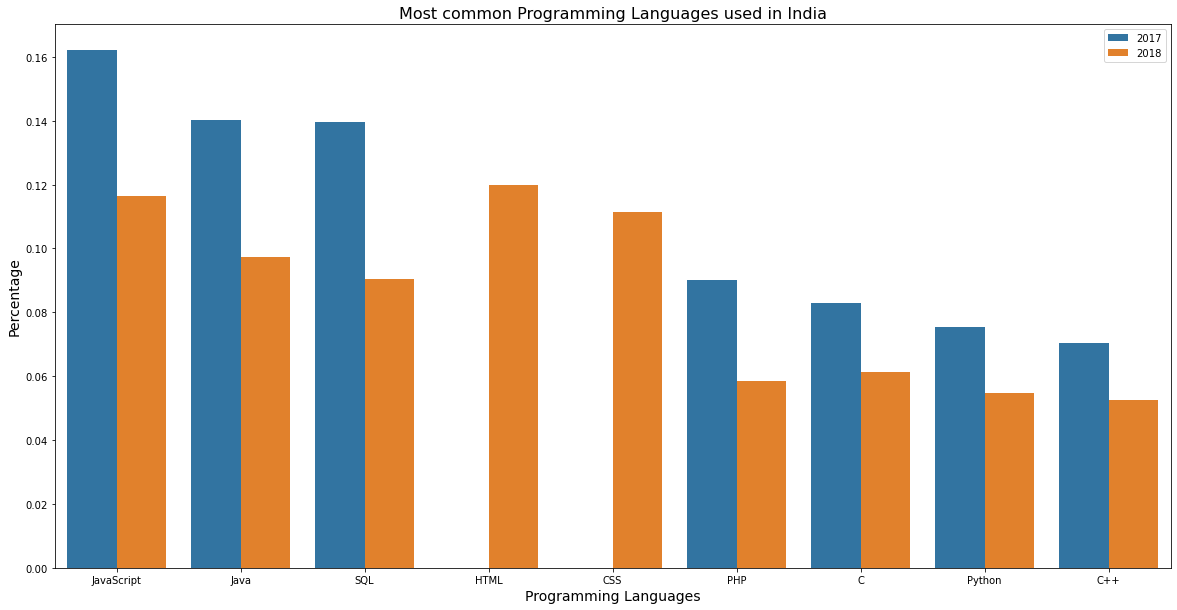

In [97]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Programming Language', 
            y = 'Percentage',
            hue = 'Year',
            data = worked_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Programming Languages", fontsize = 14)
plt.ylabel("Percentage", fontsize = 14)
plt.legend(title_fontsize='40')
plt.title('Most common Programming Languages used in India', size = 16)
plt.show()

## Evaluate the Results

* The Highest Rate of percentage among all Programming Languages JavaScript have highest growth rate in 2017 which is around 16% whereas this percentage is drop significantly in 2018 about 4% in India.
* As we can see through Graph, Java has same drop percentage about 4% in India.
* The Most Intersting this about this Graph is `HTML and CSS` it was probably not possible to select these two Languages as option in 2017 whereas in 2018 these two Programming Languages have risen such as `HTML and CSS`.

## Question 2: How does Programming Languages used at work relates with Programming Languages, People Wants to Learn in India According to Stackoverflow survey data of 2017 and 2018?

### Prepare Data

In [80]:
row = []
for j in list(zip(worked_languages_2018, wanted_languages_2018)):
    for i in j[0]:
        row.append({
            'Worked_Programming_Languages': i, 
            'Wanted_Programming_Languages': Counter(j[0])
        })
        
programming_language_transition = pd.DataFrame(row).groupby('Worked_Programming_Languages')\
                                            .agg({'Wanted_Programming_Languages': 'sum'}).reset_index()

### Data Modeling

In [82]:
for row in programming_language_transition['Worked_Programming_Languages']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_Programming_Languages']).items()])
    for key, value in dict(row['Wanted_Programming_Languages']).items():
         programming_language_transition[key].loc[index] = (value / total)

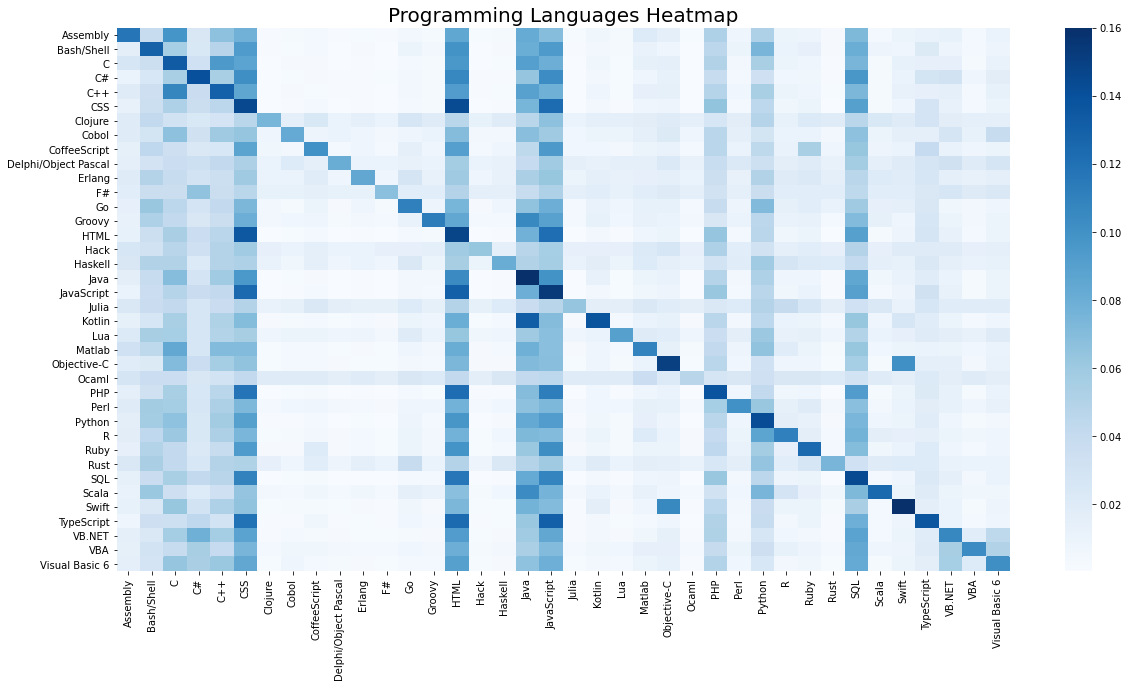

In [107]:
prlt = programming_language_transition.drop('Wanted_Programming_Languages', axis=1)\
                                        .set_index('Worked_Programming_Languages')

plt.figure(figsize=(20, 10))
sns.heatmap(prlt, cmap = "Blues")
plt.title('Programming Languages Heatmap', size = 20)
plt.ylabel('')
plt.show()

## Evaluate the Results

* With this Graph we can have some insights and they are:
  * `HTML` is highly correlated with every Programming Language (except: Rust, Ocaml, Julia, Hack, Haskell and Clojure) and `CSS` also have same trends like HTML.
  * There are around 27 Programming Language which has nearly no correlation among them with anyone.
  * `HTML` has strongest correlation between `CSS` and `JavaScript` (i.e. about `12% to 14%`).
  * There is one noticeable thing that `Objectice C` and `Swift` are strongly correlated with each other (i.e. about `10% to 12%`).

## Question 3: What are the most wanted Programming Languages in India According to Stackoverflow survey data of 2017 and 2018?

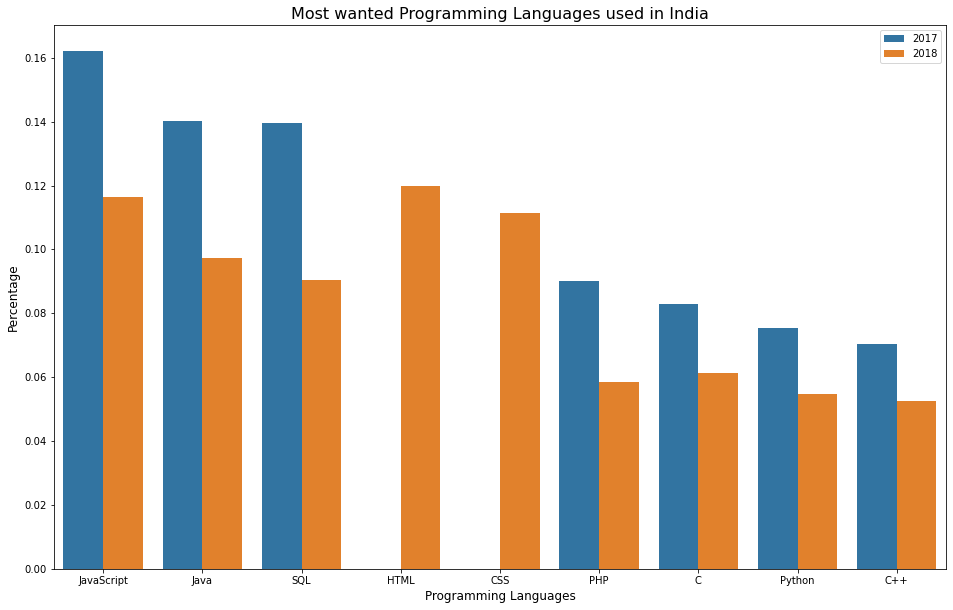

In [100]:
plt.figure(figsize=(16,10))
sns.barplot(x = 'Programming Language', 
            y = 'Percentage',
            hue = 'Year',
            data = worked_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in India', size = 16)
plt.xlabel("Programming Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.legend(title_fontsize='40')
plt.show()

## Evaluate the Results

* Most of the programming languages that have appeared as programming languages most used at work, also appeared in the ranking of most wanted programming languages, this show us that are many people wanting to learn these languages.